In [1]:
# Importing all the necessary libraries for EDA and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import scipy.stats as stats
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


Data Cleaning 

In [2]:
# importinga nd reading data 
my_df = pd.read_csv('C:/Users/mishrap6/OneDrive - Zimmer Biomet/Downloads/DS1_C4_S9_data.csv')
my_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0         68               2015               July   
1  Resort Hotel            0         14               2015               July   
2  Resort Hotel            0         10               2015               July   
3  Resort Hotel            0          9               2015               July   
4  Resort Hotel            0         51               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          2   
2                        27                          3   
3                        27                          3   
4                        28                          6   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     4       2  ...    No Deposit   
1                        0                     2       2  ...    No Deposit   
2                        0                     2       2  ...    No Deposit   
3                        0                     1       2  ...    No Deposit   
4                        1                     3       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type     adr  \
0  240.0     NaN                    0     Transient   97.00   
1  242.0     NaN                    0     Transient   98.00   
2  240.0     NaN                    0     Transient  153.00   
3  241.0     NaN                    0     Transient   94.71   
4  241.0     NaN                    0     Transient  117.81   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          3           Check-Out   
1                            0                          1           Check-Out   
2                            1                          0           Check-Out   
3                            0                          0           Check-Out   
4                            1                          2           Check-Out   

  reservation_status_date  
0              05-07-2015  
1              04-07-2015  
2              05-07-2015  
3              04-07-2015  
4              10-07-2015  

[5 rows x 32 columns]

In [4]:
# Diplaying basic info 

print(my_df.columns)
print(my_df.isnull().sum())

#check numerical and categorical cloumns
numerical_col = my_df.select_dtypes(include = ['int64', 'float64']).columns
print("numerical_col are : \n",numerical_col)

categorical_col = my_df.select_dtypes(include = ['object', 'category']).columns
print("categorical_col are: \n",categorical_col)                               


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_

In [5]:

# numerical columns - agent, company have null values only

# calc mode :

agent_mode = my_df['agent'].mean()
print("Mean of Agent column:", agent_mode)

company_mode = my_df['company'].mean()
print("Mean of company column:", company_mode)

#imputing missing values :
my_df['agent'].fillna(my_df['agent'].mean(), inplace = True) 
my_df['company'].fillna(my_df['company'].mean(), inplace = True)

print(my_df.isnull().sum())

Mean of Agent column: 74.78223350253808
Mean of company column: 234.0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list          

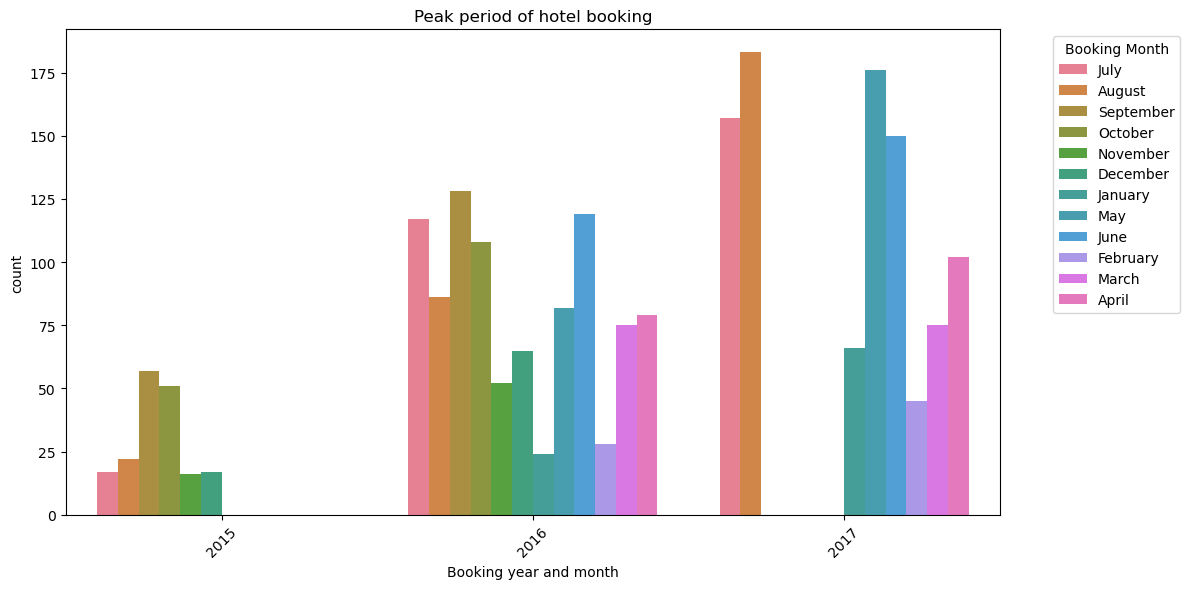

In [6]:
# Task 2 

#2.1 What are peak booking period for the hotel.
# Create a bar graphs which specifies the booking year and booking month

plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_year', hue = 'arrival_date_month', data = my_df)
plt.title('Peak period of hotel booking')
plt.xlabel('Booking year and month')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='Booking Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



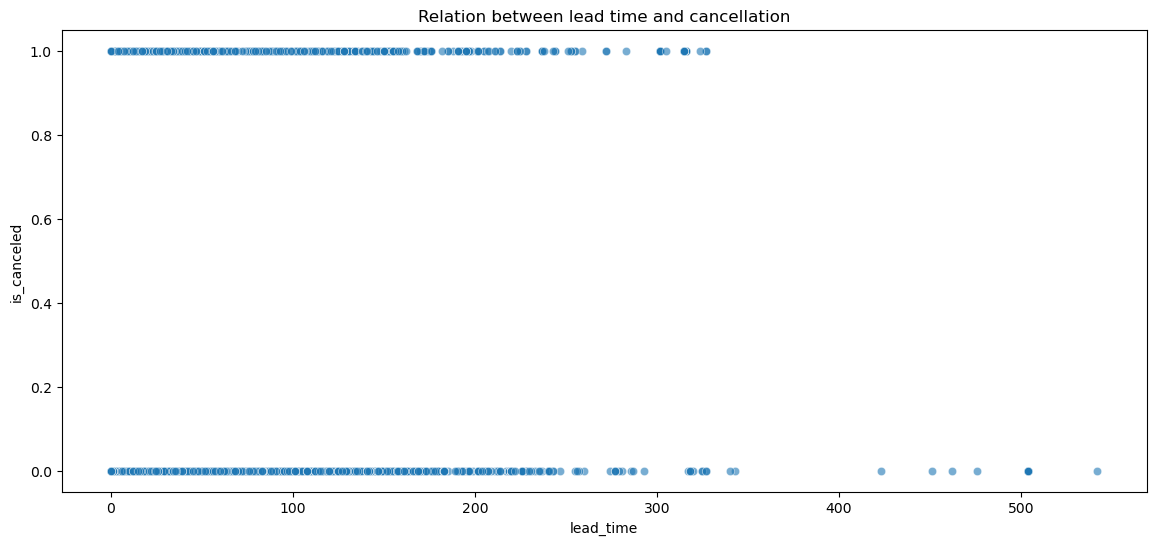

In [7]:
# Task 2.1

#create a scatter plot and check the relation between these columns

plt.figure(figsize=(14,6))
sns.scatterplot(x='lead_time', y='is_canceled', data=my_df, alpha=0.6)
plt.title('Relation between lead time and cancellation')
plt.xlabel('lead_time')
plt.ylabel('is_canceled')
plt.show()

There isn't a strong linear or direct correlation between lead time and cancellation. However, the plot suggests that bookings made with shorter lead times are slightly less likely to be canceled, while cancellations still occur across a wide range of lead times

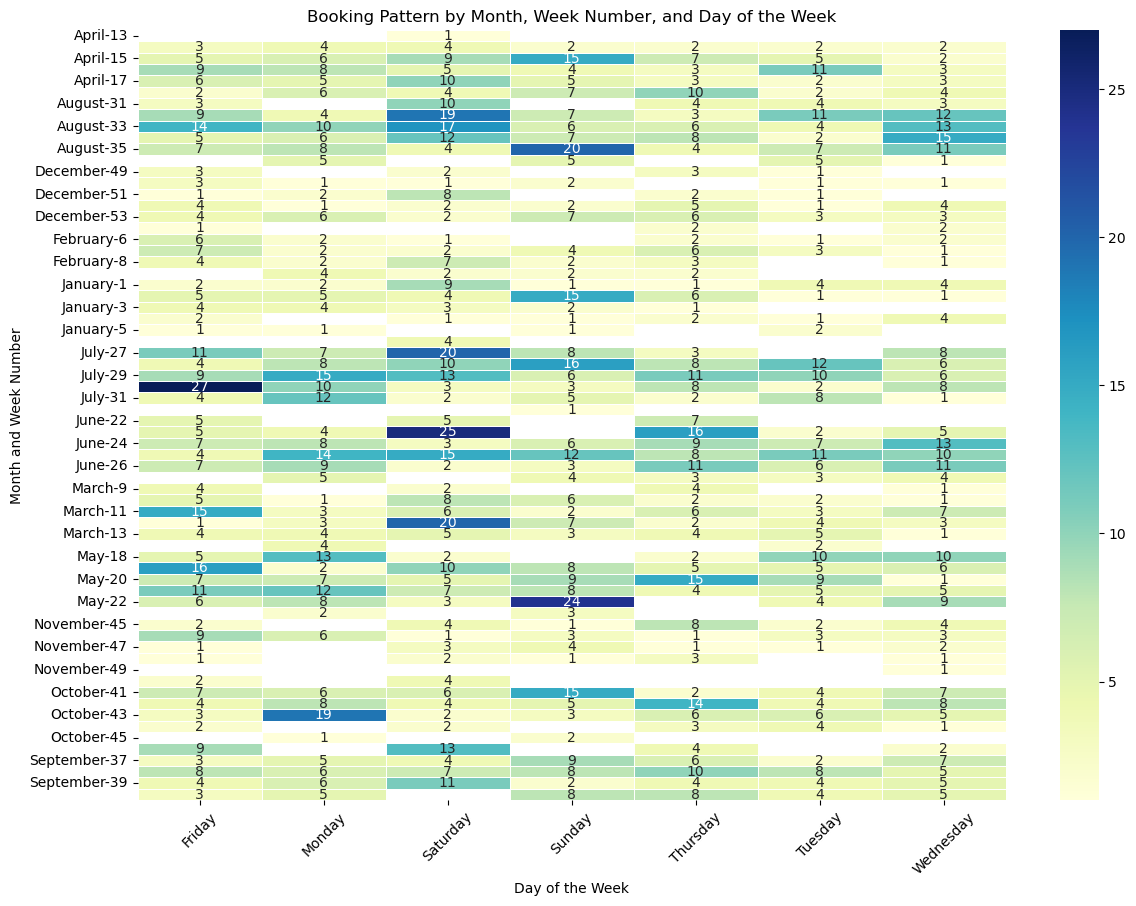

In [9]:
# Task 2.3 -Booking pattern by month, week and day of the week

# displaying via heat map

# Ensure 'reservation_status_date' or any date column is in datetime format
my_df['arrival_date'] = pd.to_datetime(my_df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

# Extract the day of the week from the date column
my_df['day_of_week'] = my_df['arrival_date'].dt.day_name()

# Pivot table for bookings by month, week number, and day of the week
pivot_table = my_df.pivot_table(values='is_canceled', index=['arrival_date_month', 'arrival_date_week_number'], columns='day_of_week', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Booking Pattern by Month, Week Number, and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month and Week Number')
plt.xticks(rotation=45)
plt.show()


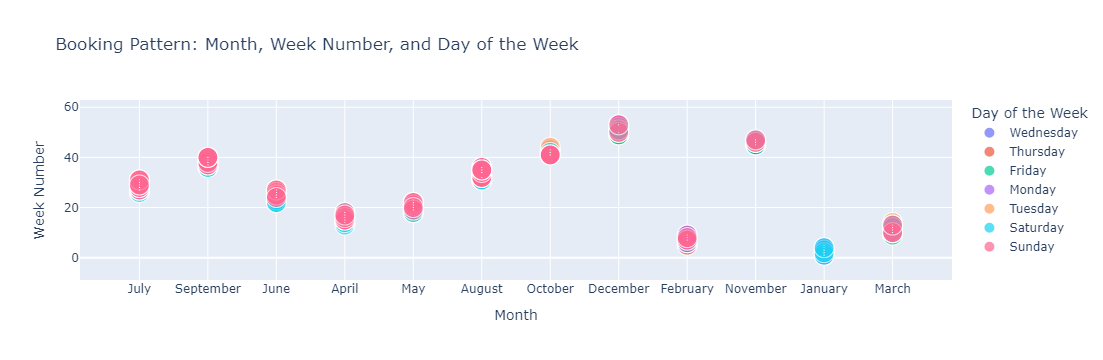

In [10]:
import plotly.express as px

# Ensure 'arrival_date' is in datetime format for consistency
my_df['arrival_date'] = pd.to_datetime(my_df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

# Extract day of the week from the date
my_df['day_of_week'] = my_df['arrival_date'].dt.day_name()

# Create a scatter plot with 'arrival_date_month' on the x-axis, 'arrival_date_week_number' on the y-axis, 
# 'day_of_week' as color, and 'is_canceled' as size.
fig = px.scatter(my_df, 
                 x='arrival_date_month', 
                 y='arrival_date_week_number', 
                 color='day_of_week', 
                 size='is_canceled',
                 title='Booking Pattern: Month, Week Number, and Day of the Week',
                 labels={'arrival_date_month':'Month', 'arrival_date_week_number':'Week Number', 'day_of_week':'Day of the Week'},
                 hover_data=['arrival_date_day_of_month'])

# Display the plot
fig.show()


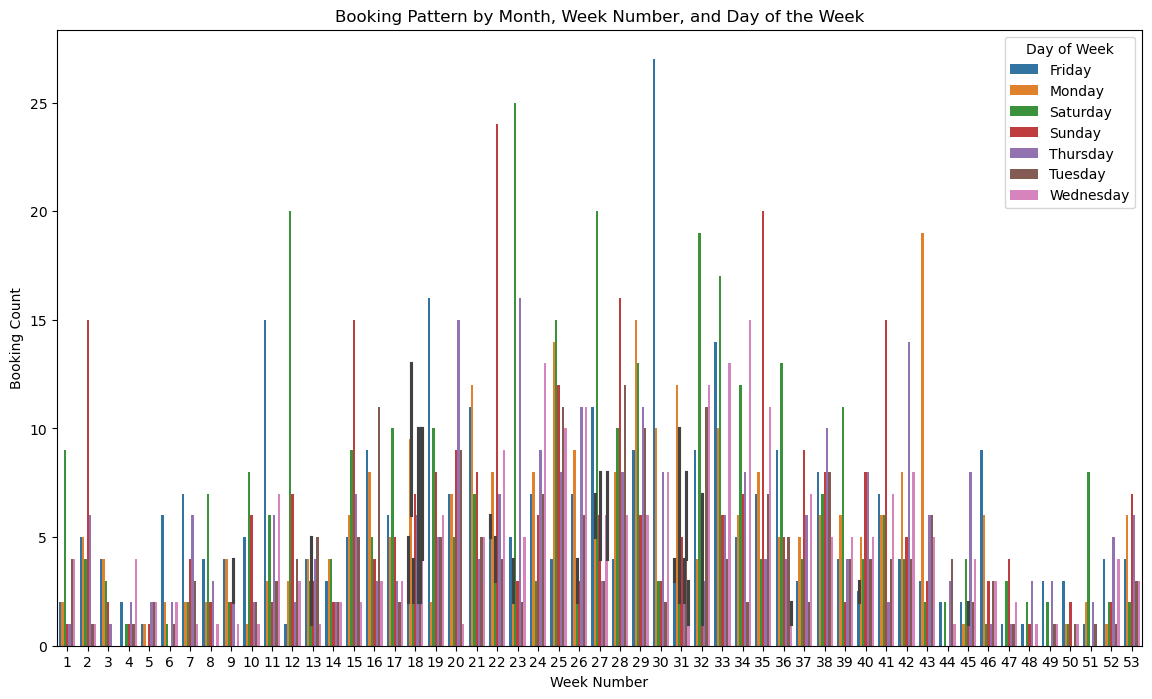

In [11]:

# Ensure 'arrival_date' is in datetime format for consistency
my_df['arrival_date'] = pd.to_datetime(my_df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

# Extract day of the week from the date
my_df['day_of_week'] = my_df['arrival_date'].dt.day_name()

# Group by month, week number, and day of the week, and calculate booking counts
grouped_data = my_df.groupby(['arrival_date_month', 'arrival_date_week_number', 'day_of_week']).size().reset_index(name='booking_count')

# Create a bar plot with 'arrival_date_month' and 'arrival_date_week_number' for 'day_of_week'
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, 
            x='arrival_date_week_number', 
            y='booking_count', 
            hue='day_of_week')

plt.title('Booking Pattern by Month, Week Number, and Day of the Week')
plt.xlabel('Week Number')
plt.ylabel('Booking Count')
plt.legend(title='Day of Week')
plt.show()


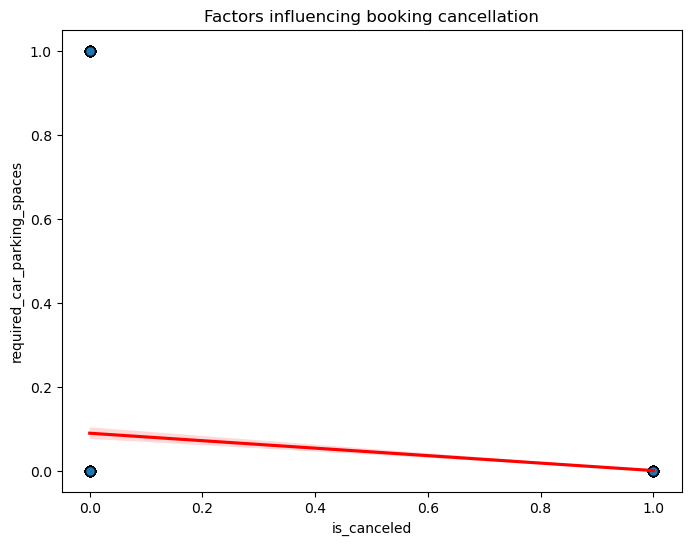

In [73]:
# Task 3 (Booking Cancelation Analysis)

#scatterplot to analyse Factors influencing booking cancellation

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x='is_canceled', y='required_car_parking_spaces', data=my_df, scatter_kws={'s':50, 'edgecolor':'black'}, line_kws={'color':'red'})
plt.title('Factors influencing booking cancellation')
plt.xlabel('is_canceled')
# Display the plot
plt.show()

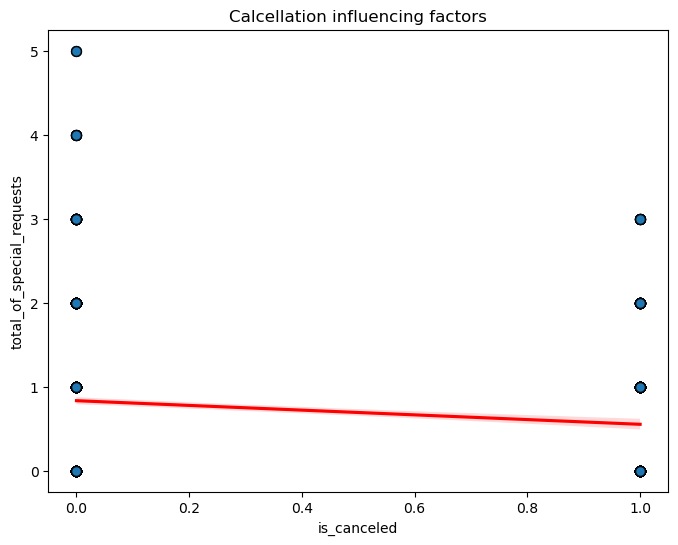

In [101]:
# Task 3.1 b


plt.figure(figsize = (8,6))
sns.regplot(x='is_canceled', y= 'total_of_special_requests', data =my_df, scatter_kws = {'s':50,'edgecolor':'black'}, line_kws={'color':'red'})

plt.title('Calcellation influencing factors')
plt.show()




In [85]:
correlation = my_df['is_canceled'].corr(my_df['company'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 4.809338358723435e-18


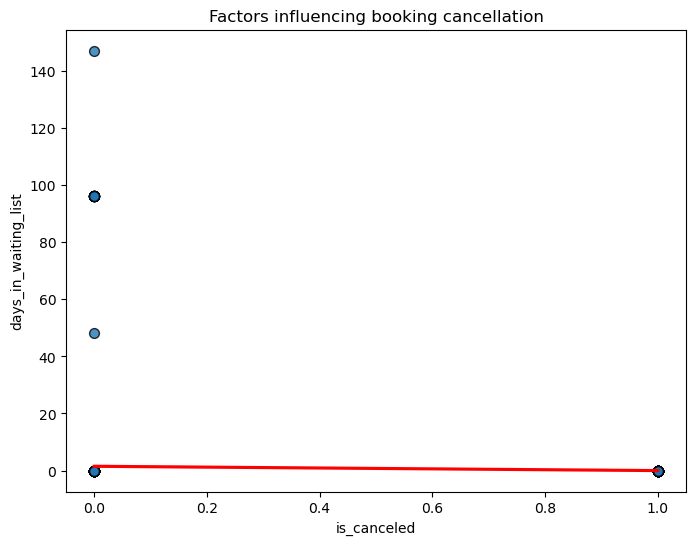

In [99]:
# Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x='is_canceled', y='days_in_waiting_list', data=my_df, scatter_kws={'s':50, 'edgecolor':'black'}, line_kws={'color':'red'})
plt.title('Factors influencing booking cancellation')
plt.xlabel('is_canceled')
# Display the plot
plt.show()



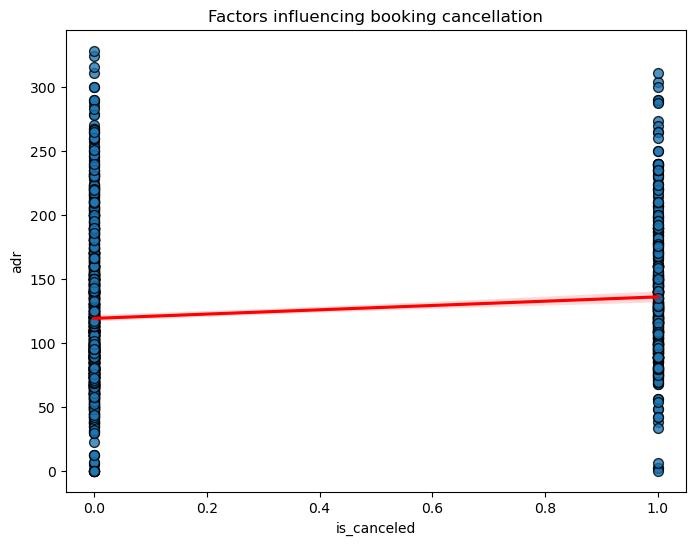

In [103]:
# Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x='is_canceled', y='adr', data=my_df, scatter_kws={'s':50, 'edgecolor':'black'}, line_kws={'color':'red'})
plt.title('Factors influencing booking cancellation')
plt.xlabel('is_canceled')
# Display the plot
plt.show()

In [105]:
print(my_df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'day_of_week'],
      dtype='object')


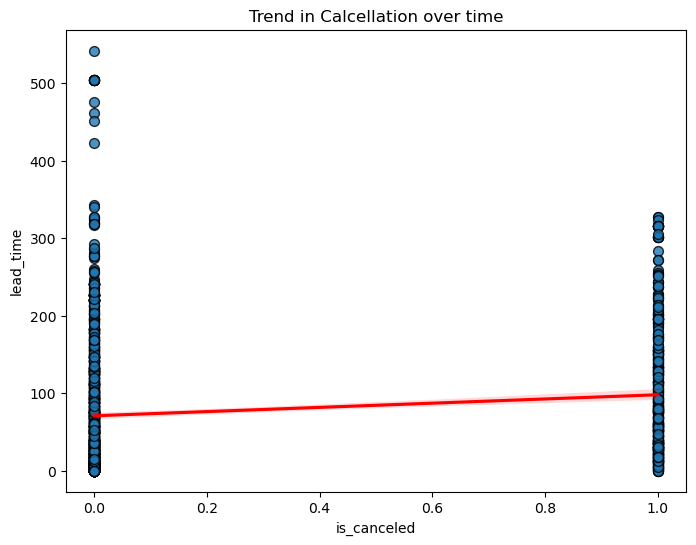

In [133]:
# Scatter plot


plt.figure(figsize=(8,6))
sns.regplot(x='is_canceled', y='lead_time', data=my_df, scatter_kws={'s':50, 'edgecolor':'black'}, line_kws={'color':'red'})
plt.title('Trend in Calcellation over time')
plt.xlabel('is_canceled')
# Display the plot
plt.show()

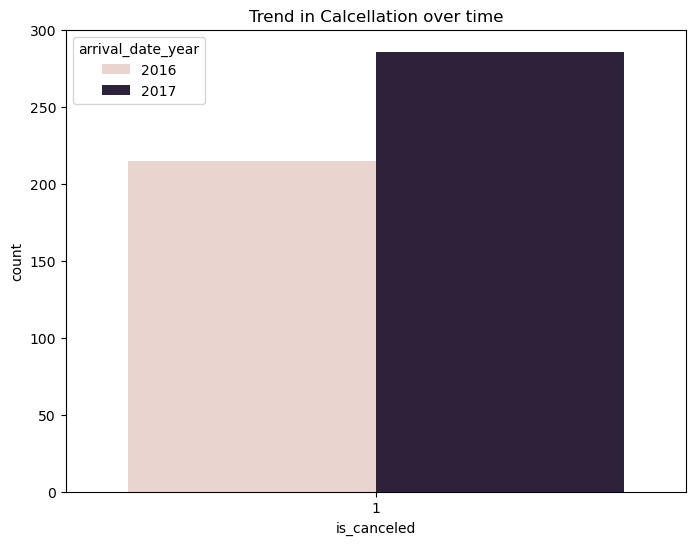

In [129]:
# bargraph to analyse trend

# Filter the DataFrame to include only rows where is_canceled is 1
filtered_df = my_df[my_df['is_canceled'] == 1]

plt.figure(figsize=(8,6))
sns.countplot(x='is_canceled', hue='arrival_date_year', data=filtered_df)
plt.title('Trend in Calcellation over time')
plt.xlabel('is_canceled')
# Display the plot
plt.show()


## The cancellation tend increase over time

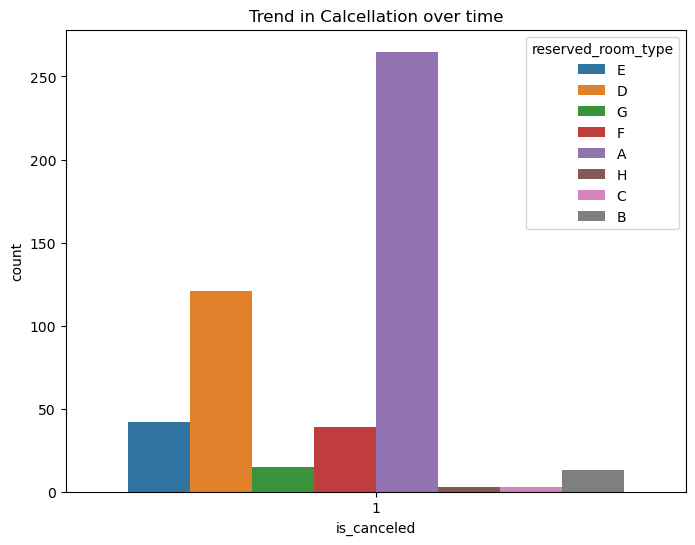

In [127]:


# bargraph to analyse trend
plt.figure(figsize=(8,6))
sns.countplot(x='is_canceled', hue='reserved_room_type', data=filtered_df)
plt.title('Trend in Calcellation over time')
plt.xlabel('is_canceled')
# Display the plot
plt.show()


## 'A' ategory rooms are highly tends to be canceled

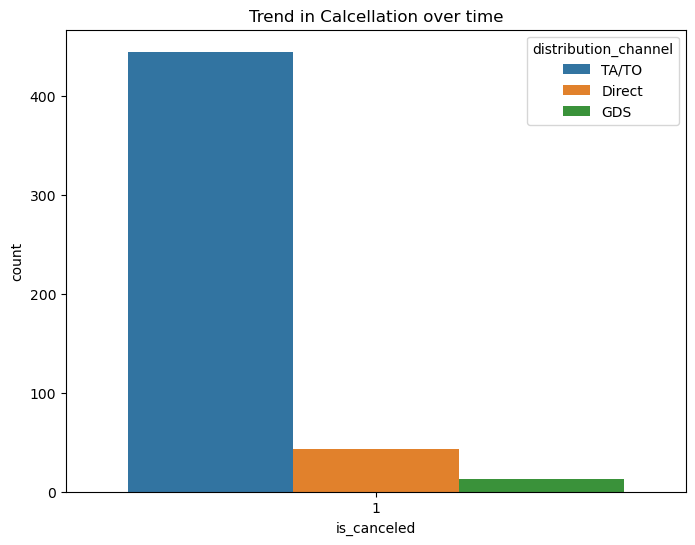

In [125]:


# bargraph to analyse trend
plt.figure(figsize=(8,6))
sns.countplot(x='is_canceled', hue='distribution_channel', data=filtered_df)
plt.title('Trend in Calcellation over time')
plt.xlabel('is_canceled')
# Display the plot
plt.show()


## Booking done through Distribution channel - TA/TO are highly tends to be canceled

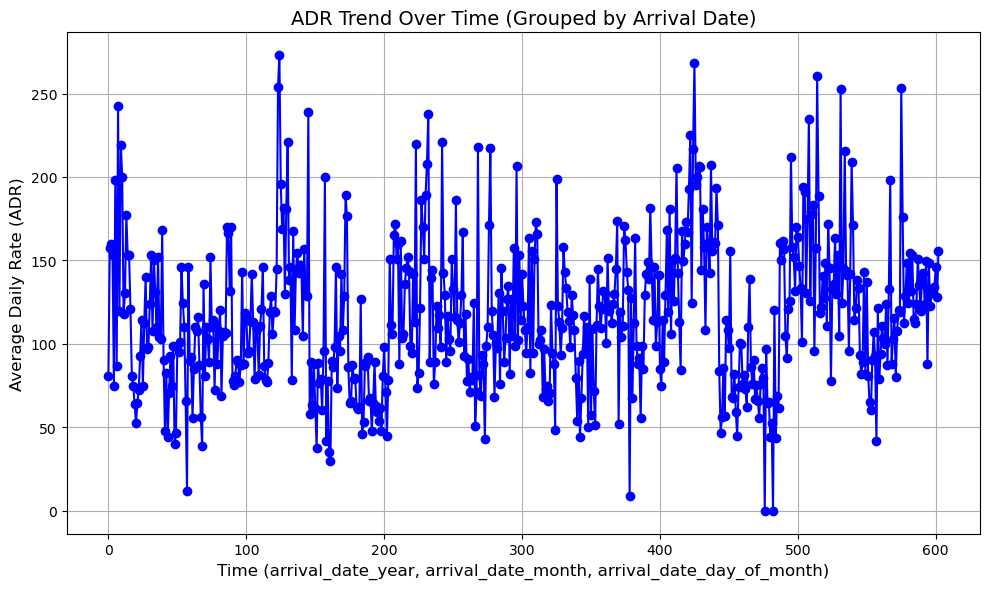

In [137]:
# Task 4 : customer Behavioral segmentation

import pandas as pd
import matplotlib.pyplot as plt

# Assuming my_df contains your data and ADR is a column
# Group by year, month, and day and calculate the mean ADR
grouped_df = my_df.groupby(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'])['adr'].mean().reset_index()

# Create a line chart
plt.figure(figsize=(10,6))
plt.plot(grouped_df.index, grouped_df['adr'], marker='o', color='b')

# Add labels and title
plt.title('ADR Trend Over Time (Grouped by Arrival Date)', fontsize=14)
plt.xlabel('Time (arrival_date_year, arrival_date_month, arrival_date_day_of_month)', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)

# Display the plot
#plt.xticks(ticks=grouped_df.index, labels=grouped_df.apply(lambda row: f"{row['arrival_date_year']}-{row['arrival_date_month']}-{row['arrival_date_day_of_month']}", axis=1), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()





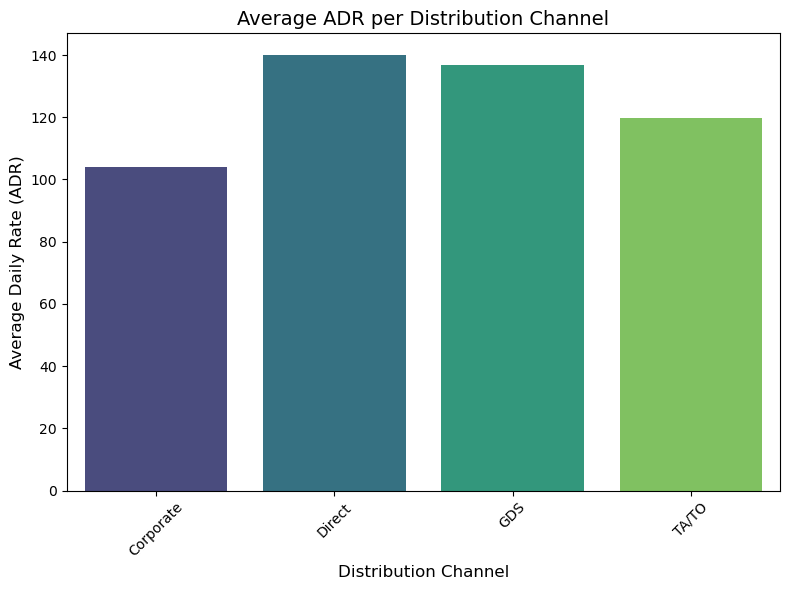

In [139]:
# Task 6



# Group by distribution channel and calculate mean ADR
grouped_channel_adr = my_df.groupby('distribution_channel')['adr'].mean().reset_index()

# Plot a bar chart for ADR by distribution channel
plt.figure(figsize=(8,6))
sns.barplot(x='distribution_channel', y='adr', data=grouped_channel_adr, palette='viridis')
plt.title('Average ADR per Distribution Channel', fontsize=14)
plt.xlabel('Distribution Channel', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


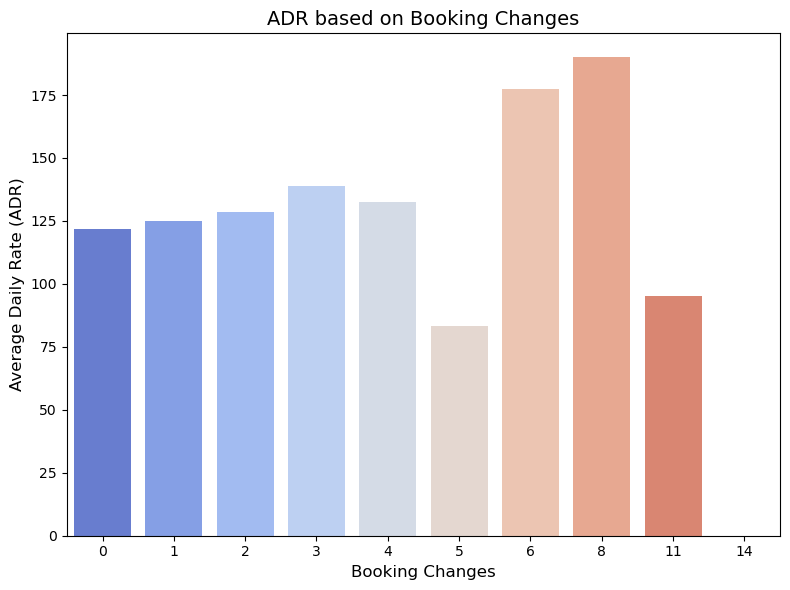

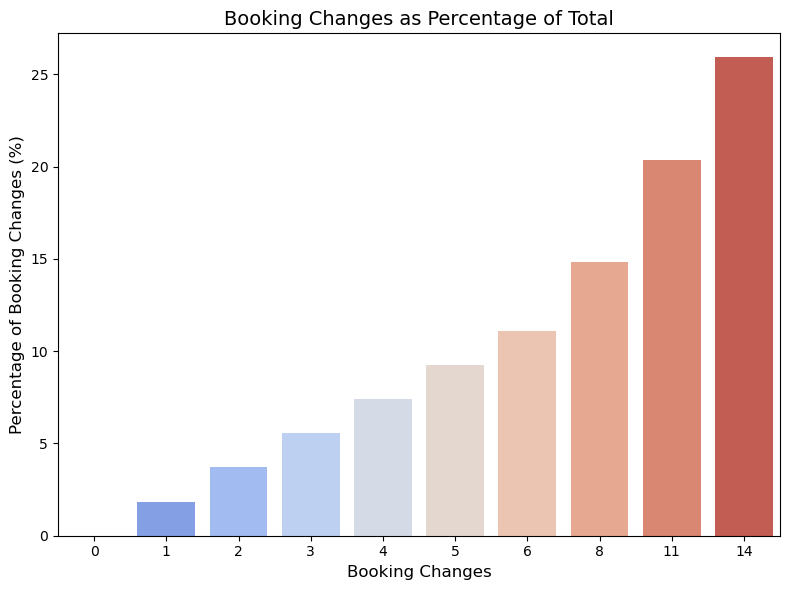

In [141]:
# Group by booking changes and calculate mean ADR
grouped_booking_changes = my_df.groupby('booking_changes')['adr'].mean().reset_index()

# Calculate the percentage change in booking changes
grouped_booking_changes['booking_change_percentage'] = (grouped_booking_changes['booking_changes'] / grouped_booking_changes['booking_changes'].sum()) * 100

# Plot a line chart for ADR by booking changes
plt.figure(figsize=(8,6))
sns.barplot(x='booking_changes', y='adr', data=grouped_booking_changes, palette='coolwarm')
plt.title('ADR based on Booking Changes', fontsize=14)
plt.xlabel('Booking Changes', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.tight_layout()
plt.show()

# Plot the percentage of booking changes
plt.figure(figsize=(8,6))
sns.barplot(x='booking_changes', y='booking_change_percentage', data=grouped_booking_changes, palette='coolwarm')
plt.title('Booking Changes as Percentage of Total', fontsize=14)
plt.xlabel('Booking Changes', fontsize=12)
plt.ylabel('Percentage of Booking Changes (%)', fontsize=12)
plt.tight_layout()
plt.show()


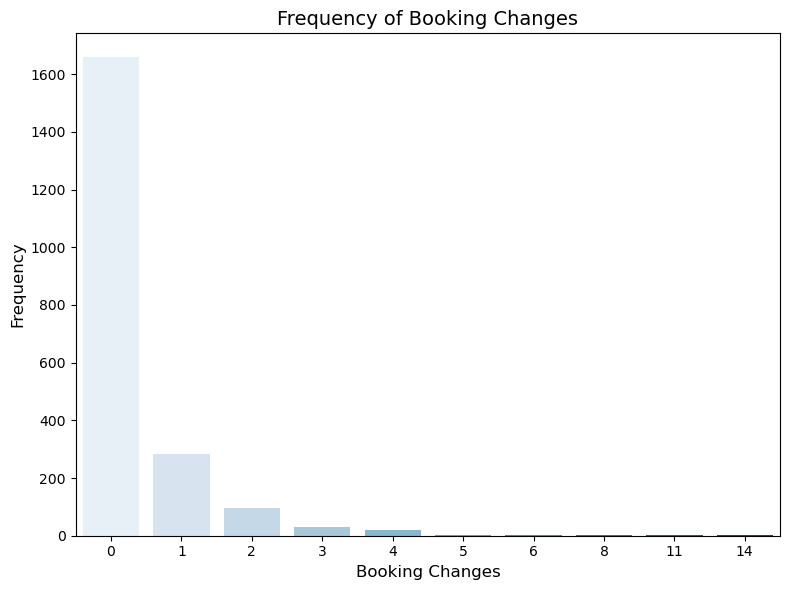

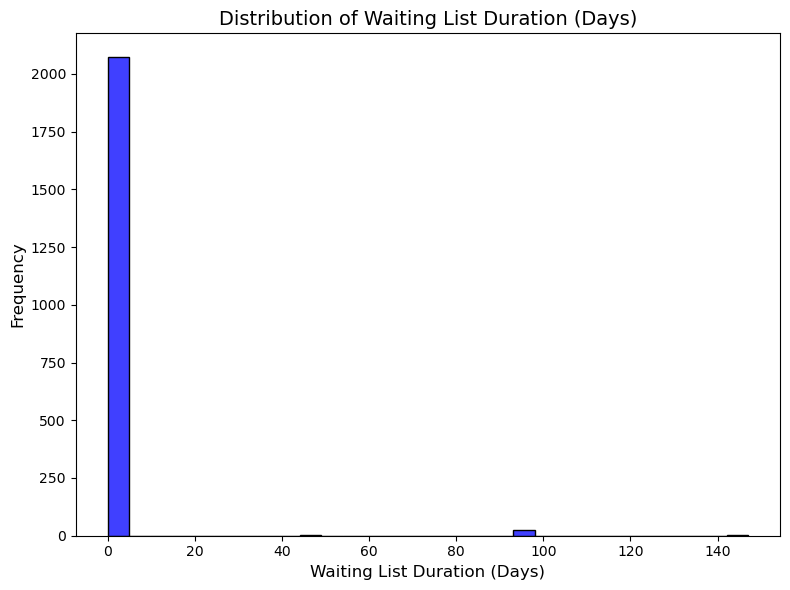

In [151]:
# Calculate the frequency of booking changes
booking_change_freq = my_df['booking_changes'].value_counts().reset_index()
booking_change_freq.columns = ['booking_changes', 'frequency']

# Plot the frequency of booking changes
plt.figure(figsize=(8,6))
sns.barplot(x='booking_changes', y='frequency', data=booking_change_freq, palette='Blues')
plt.title('Frequency of Booking Changes', fontsize=14)
plt.xlabel('Booking Changes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Plot the waiting list duration (assuming waiting list duration is in a column 'waiting_list_duration')
plt.figure(figsize=(8,6))
sns.histplot(my_df['days_in_waiting_list'], bins=30, color='blue')
plt.title('Distribution of Waiting List Duration (Days)', fontsize=14)
plt.xlabel('Waiting List Duration (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()
